# Linear Regression 

**Linear Regression** is one of the common and popular algorithm in Machine Learning. Infact, typically this would be the first algorithm that you will encounter while learning Machine Learning.

Linear regression as the name suggests is a model that assumes a linear relationship between independent variable (x) and the dependent or target variable (y). There are two types on Linear Regression Model :-

**Simple Linear Regression** : Linear model between  one independent variable (x) and target variable (y).

**Multiple Linear Regression** : Linear model between two or more independent variables (x1, x2 ...) and target variable (y).

Linear regression model would predict the output (dependent variable) as a function of independent variable.

               Y = a + b X

where, Y : Predictor Variable
            X : Independent Variable
            a  : Intercept of regression line (i.e. value of Y when X=0)
            b  : Slope of regression line (i.e. rate of change of Y when X is incremented by 1 unit)


For Multiple Linear Regression, equation would be

             Y = a + b1X1 + b2X2 + b3X3 + ......

Let's start with Linear Regression using Python. For this tutorial, I'll be using Boston Housing Price Data Set, which is provided in SciKit Learn library [SciKit Link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html). Details about this data set can be found at [Link](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

First import all the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

We will load the dataset using load_boston method, this will return a Bunch object. Bunch object is like a Python dictionary, let's quickly look at the significance of keys :- <br>

data &emsp;: &emsp; Data to learn<br>
target &emsp;: &emsp; Target column, for this example Median value of owner occupied home will be the target<br>
DESCR &emsp;: &emsp; Description of dataset including the headers significance<br>
feature_names &emsp;: &emsp; Names of header<br>
filename &emsp;: &emsp; Physical location from where the data was created<br>


In [2]:
boston = load_boston()

### Quick Analysis of Data Set

In [3]:
print("Shape for Data is", boston.data.shape) 
print("Shape for Target is", boston.target.shape) 
print("Names of header :\n", boston.feature_names)
print("Dataset description :\n", boston.DESCR)

Shape for Data is (506, 13)
Shape for Target is (506,)
Names of header :
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Dataset description :
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted di

In [4]:
# Create a Pandas Data Frame from this data set

df = pd.DataFrame(boston.data)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


As you can see that the data frame has no header names and is also missing our target column. Let's fix this first :-

In [5]:
df.columns = boston.feature_names
df['MEDV'] = boston.target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


### Data Wrangling

If we check our data, it doesn't seems to have any missing value. So, we will assume this as cleaned data and will use as such.

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis

In [8]:
# Descriptive Statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Let's use some visualization techniques on our data to understand the distribution and relationship of independent variables with our target variable.

For distribution of data, we will use Histogram. Before proceeding, let's look at what Histogram is :-

A **histogram** is a type of bar graph that shows the frequency or number of values compared to a set of value ranges.
To construct a histogram, the first step is to “bin” the range of values — that is, divide the entire range of values
into a series of intervals — and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but are not required to be) of equal size.

Let's use histogram to view the data distribution in our case. *Look closely at our target (MEDV) and notice that the 
prices are mainly in the mid range distribution*.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc064276940>,
      dtype=object)

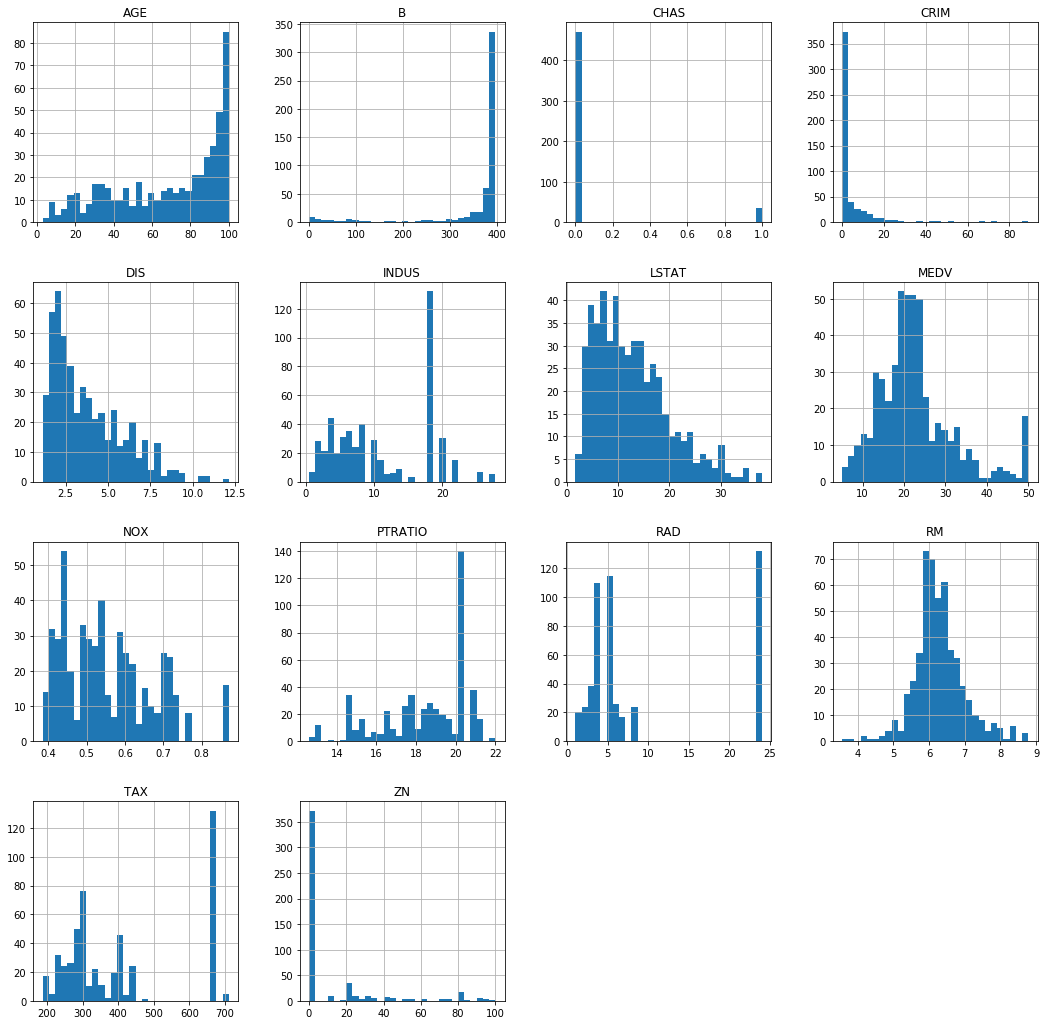

In [9]:
df.hist(bins=30, figsize=(18,18))

To visualize the relationship between independent variables and target variable (MEDV), we will use **Regression Plot**, which is basically a Scatter Plot with fitted regression line. We use regression plot for variables with continous values, while a box plot will be used for categorical variables.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


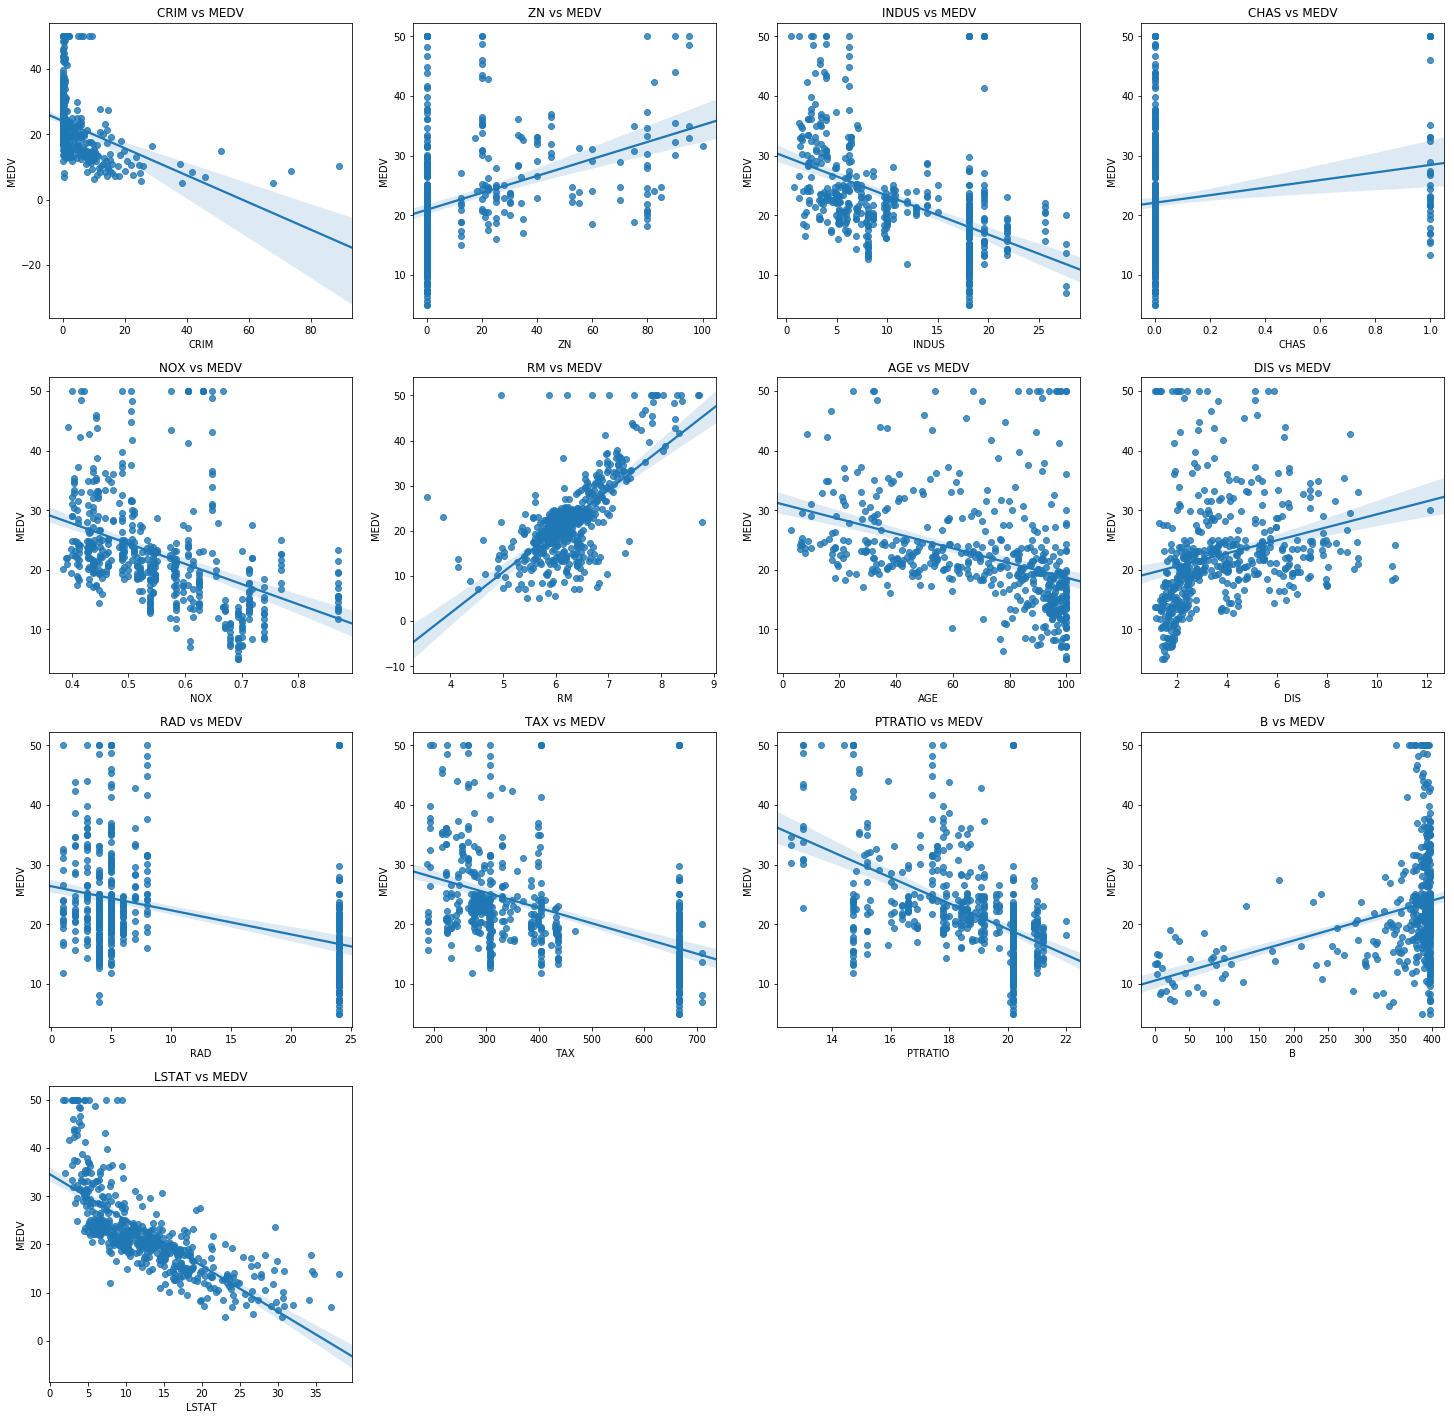

In [10]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(boston.feature_names):
    plt.subplot(4, 4 , i+1)
    sns.regplot(x=col, y='MEDV', data=df)
    plt.title("%s vs MEDV" %(col))

**Observations so far :-**

- Variable **'RM'** seems to have positive linear relationship with target variable **'MEDV'**.
- Variable **'LSTAT'** seems to have negative linear relationship with target variable **'MEDV'**.

Let's use other statistical methods to confirm our observations. We will use Pearson Corelation as our statistical tool.

**What is Pearson Corelation?**

A Pearson Corelation is a number between -1 and 1 which indicates the extent to which two variables are linearly related.

Corelation Cofficient:

1 - Positively correlated
-1 - Negatively correlated.
0 - Not correlated.

P-value:

The P-value is the probability value that the correlation between these two variables is statistically significant.

By convention, when the

p-value is  < 0.001: we say there is strong evidence that the correlation is significant. <br>
the p-value is  < 0.05: there is moderate evidence that the correlation is significant. <br>
the p-value is  < 0.1: there is weak evidence that the correlation is significant. <br>
the p-value is  > 0.1: there is no evidence that the correlation is significant. <br>

We will use the Pandas data frame method "corr()" to find the co-relation and then use the Seaborn's Heatmap to plot it.

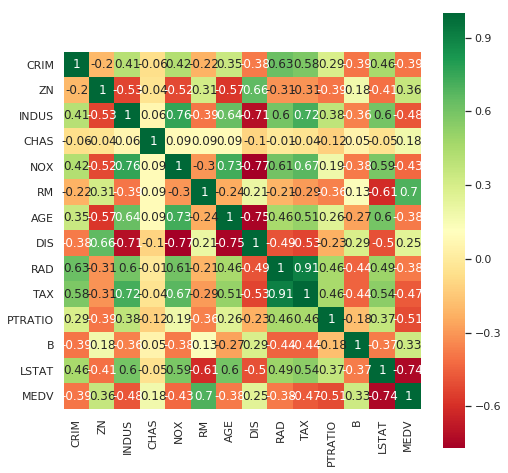

In [11]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(df.corr().round(2), square=True, cmap='RdYlGn', annot=True)

We observed visually that attributes **'RM'** exhibits postive linear relationship, which seems correct as per Corelation Cofficient with a value of 0.7. We also observed that **'LSTAT'** exhibits negative linear relationship with **'MEDV'** and this seems to be correct statistically as well with a cofficient value of -0.74.

Let's also look at the p-value as well.

In [12]:
pearson_coef1, p_value1 = stats.pearsonr(df['RM'], df['MEDV'])
print("The Pearson Correlation Coefficient for RM is", pearson_coef1, " with a P-value of P = ", p_value1)  

pearson_coef2, p_value2 = stats.pearsonr(df['LSTAT'], df['MEDV'])
print("The Pearson Correlation Coefficient for LSTAT is", pearson_coef2, " with a P-value of P = ", p_value2) 

print("Is there strong evidence if corelation is signifcant for RM :- ", p_value1 < 0.001) 
print("Is there strong evidence if corelation is signifcant for LSTAT :- ", p_value2 < 0.001) 

The Pearson Correlation Coefficient for RM is 0.6953599470715393  with a P-value of P =  2.487228871008295e-74
The Pearson Correlation Coefficient for LSTAT is -0.7376627261740147  with a P-value of P =  5.081103394389002e-88
Is there strong evidence if corelation is signifcant for RM :-  True
Is there strong evidence if corelation is signifcant for LSTAT :-  True


As you can notice, our corelation is significant for variables **'RM'** and **'LSTAT'**.

## Linear Model Creation

Now that we have indentified few variables which appears to have linear relationship with our target data, we will start developing the Linear Regression Model.

We will start with **Simple Linear Regression**. As stated above, Simple Linear Regression only uses one variable, so we will use only **'RM'** attribute.

First, we will import the LinearRegression class from the SciKit library and create a LinearRegression object. Then we will train the model, find the slope and intercept and finally we will do some prediction.

NOTE : For this post as part of explaining linear regression model, I will be using the entire data set for training. In real world, we will split the data into test and training data. This will be covered in a later post.

In [13]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression Object
lm1 = LinearRegression()
X1 = df[['RM']]
Y1 = df[['MEDV']] # Target

# Fit (Train) the model
lm1.fit(X1,Y1)

print("Intercept for the model is", lm1.intercept_, "and the scope is",lm1.coef_)

# Prediction
Yout1 = lm1.predict(X1)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout1[0:5])
print("Actual Values:",Y1.values[0:5])


Intercept for the model is [-34.67062078] and the scope is [[9.10210898]]
Predicted Values: [[25.17574577]
 [23.77402099]
 [30.72803225]
 [29.02593787]
 [30.38215211]]
Actual Values: [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


Now, we will develop the **Multiple Linear Regression** with two variables - 'RM' and 'LSTAT'.

In [14]:
lm2 = LinearRegression()
X2 = df[['RM', 'LSTAT']]
Y2 = df[['MEDV']]

# Fit (Train) the model
lm2.fit(X2,Y2)

print("Intercept for the model is", lm2.intercept_, "and the scope is",lm2.coef_)

# Prediction
Yout2 = lm2.predict(X2)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout2[0:5])
print("Actual Values:",Y2.values[0:5])

Intercept for the model is [-1.35827281] and the scope is [[ 5.09478798 -0.64235833]]
Predicted Values: [[28.94101368]
 [25.48420566]
 [32.65907477]
 [32.40652   ]
 [31.63040699]]
Actual Values: [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


## Model Visualization

We will visualize our models that we have created. For Simple Linear Regression, we can either use **Regression Plot** or **Residual Plot**. In case of regression plot, we need to focus on spread of data from regression line. If the data is too far from regression line, then we can say that Linear Model is not the best fit.

Since we have already used Regression Plot, we will use Residual Plot. A Residual is the difference between observed value (Y) and predicted value (Yout). In residual plot, X-axis will have independent variable and Y-Axis will have residuals.

What to look in residual plot?

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate 
for the data. Randomly spread out residuals means that the variance is constant, and thus the linear model is a good
fit for this data.


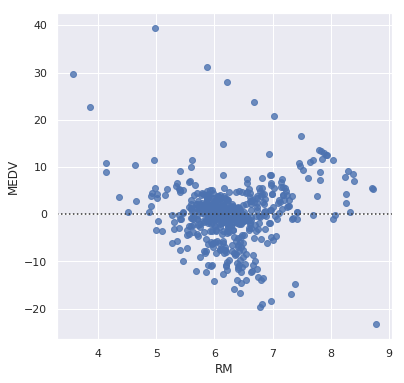

In [15]:
# Seaborn library to be used for Residual Plot
plt.figure(figsize=(6,6))
sns.residplot(df['RM'],df['MEDV'])
plt.show()

For Multiple Linear Regression, we can't use Regression or Residual Plot because of multiple independent variables, so we will use Distribution Plot.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


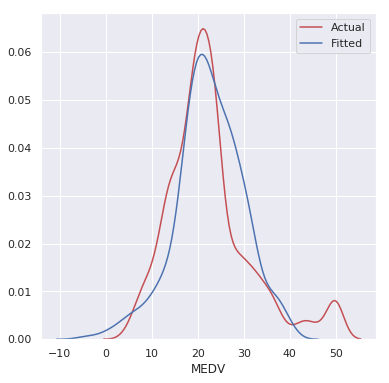

In [16]:
plt.figure(figsize=(6,6))
ax1 = sns.distplot(df['MEDV'], hist=False, color="r", label="Actual")
sns.distplot(Yout2, hist=False, color="b", label="Fitted", ax=ax1)

## Model Accuracy

We will use the following quantitative methods for finding model accuracy.

**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors. It is calculated by :-

- Finding the error between actual and predicted value
- Taking a square of it
- Sum up all the values
- Divide by number of values

**R-squared**

R squared, also known as the coefficient of determination is a measure to indicate how close the data is to the fitted regression line.

R^2 = 1 - MSE of regression line / MSE of average of data

**Which one is better model?**

- Model will less MSE and high R-Square value

We can use the sklearn.metrics.mean_squared_error to find the Mean Squared Error and model score() method to obtain R-Square value. 

In [17]:
from sklearn.metrics import mean_squared_error

# Simple Linear Regression

mse1 = mean_squared_error(Y1,Yout1)
print("Mean square error for simple linear regression is",mse1)
print("R-Square value for simple linear regression is", lm1.score(X1,Y1))
print("\n")

# Multiple Linear Regression

mse2 = mean_squared_error(Y2,Yout2)
print("Mean square error for mulitple linear regression is",mse2)
print("R-Square value for multiple linear regression is", lm2.score(X2,Y2))

Mean square error for simple linear regression is 43.60055177116956
R-Square value for simple linear regression is 0.4835254559913343


Mean square error for mulitple linear regression is 30.51246877729947
R-Square value for multiple linear regression is 0.6385616062603403


We can see that the multiple linear regression model seems to perform better because of high R-Square value and low mean square error.

## Model Evaluation : Train and Test Data, Cross Validation 

As I mentioned before, in real-world we will split our data into test and training data to evaluate our model. We will use "train_test_split" method to split our data into testing and training data. In this section, I will be using  Multiple Regression Model to illustrate this process.


In [18]:
# First step that we will take is to seperate target data

y_data = df['MEDV']
x_data = df.drop('MEDV',axis=1)

from sklearn.model_selection import train_test_split

# Split the data into test and training (15% as test data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=10)

print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

lm = LinearRegression()

# Fit (Train) the model using the training data 

lm.fit(x_train[['RM','LSTAT']],y_train)

# Prediction using Training Data
yout_train = lm.predict(x_train[['RM','LSTAT']])
print(yout_train[0:5])

# Prediction using Test Data
yout_test = lm.predict(x_test[['RM','LSTAT']])
print(yout_test[0:5])
print("\n")

# Model accuracy using Test Data
mse_test = mean_squared_error(y_test,yout_test)
print("Mean square error is",mse_test)
print("R-Square value using test data is", lm.score(x_test[['RM','LSTAT']],y_test))
print("\n")

# Model accuracy using Training Data
mse_train = mean_squared_error(y_train,yout_train)
print("Mean square error is",mse_train)
print("R-Square value using training data is", lm.score(x_train[['RM','LSTAT']],y_train))

Number of test samples : 76
Number of training samples: 430
[38.74400503  5.69000561 19.41554723 30.26876646 21.13562849]
[26.21310048 29.61955969 27.50797208 29.69508151 17.77881853]


Mean square error is 47.91753944668556
R-Square value using test data is 0.5784951912105682


Mean square error is 27.636206385020866
R-Square value using training data is 0.6375993387266081


**Cross Validation :**

Division of data into testing and training data may result into a problem especially if the data is sorted by some particular features and our testing data does not have that data. With Cross Validation, we will use entire subset of data for training and testing in iterations. This is just a brief introduction on this topic and there are other methods to perform cross validation. 

In the example below, we are using K-Fold validation technique and dividing our data into 5 folds and each of the fold will be used as a test data. We will then take the mean of all the iterations.

In [19]:
from sklearn.model_selection import cross_val_score, KFold

rcross = cross_val_score(lm, x_data, y_data, cv=KFold(n_splits=5,shuffle=True))

print(rcross)
print("The mean of the folds are", rcross.mean())

[0.63037967 0.7059202  0.72212254 0.77723733 0.73542093]
The mean of the folds are 0.7142161318352584
